# Imports

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from HANKStickyModel import HANKStickyModelClass

In [11]:
# model = HANKStickyModelClass(name='test')
model = HANKStickyModelClass(name='test', par = {'beta_mean': 0.9988,
                                                         'sigma_e': 0.36})

In [12]:
# model2 = HANKStickyModelClass(name='test')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value

In [13]:
model.find_ss(do_print=True)

find beta for market clearing
 beta =   0.998000000000 -> ss.clearing_Y =   0.000455524017 [13.6 secs]
 sigma_e =   0.390000000000 -> ss.clearing_MPC =  -0.023185166615 [13.6 secs]
 beta =   0.998000000000 -> ss.clearing_Y =   0.000455524017 [8.2 secs]
 sigma_e =   0.390000000000 -> ss.clearing_MPC =  -0.023185166615 [8.2 secs]
 beta =   0.998000000000 -> ss.clearing_Y =   0.000455524017 [8.1 secs]
 sigma_e =   0.390000000000 -> ss.clearing_MPC =  -0.023185166615 [8.1 secs]
 beta =   0.998000014871 -> ss.clearing_Y =   0.000455473080 [8.1 secs]
 sigma_e =   0.390000000000 -> ss.clearing_MPC =  -0.023184401278 [8.1 secs]
 beta =   0.998000000000 -> ss.clearing_Y =   0.000455523512 [8.2 secs]
 sigma_e =   0.390000005811 -> ss.clearing_MPC =  -0.023185161883 [8.2 secs]
 beta =   0.998974346805 -> ss.clearing_Y =  -0.000176648766 [10.1 secs]
 sigma_e =   0.356890725757 -> ss.clearing_MPC =   0.004080281499 [10.1 secs]
 beta =   0.998862643170 -> ss.clearing_Y =   0.000032267797 [10.5 secs]

In [14]:
# model.name = 'baseline_2602'
# model.save()

In [16]:
ss = model.ss
par = model.par

In [17]:
# MPCs_model = [
#     np.sum([model.jac_hh[('C_hh', 'eg_transfer')][(t * 4 + i), 0] / (1 + ss.r) ** (t * 4 + i) for i in range(4)])
#     for t in [0, 1, 2, 3, 4, 5]
# ]
# MPCs_model

[0.5250000000020553, 0.021501615128522656, 0.0, 0.0, 0.0, 0.0]

In [18]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 6.0 secs
curly_Y and curly_D calculated for eg_transfer     in 6.0 secs
curly_Y and curly_D calculated for ra              in 6.1 secs
curly_Y and curly_D calculated for rl              in 6.5 secs
curly_E calculated in 3.8 secs
builiding blocks combined in 3.3 secs
household Jacobian computed in 31.7 secs

full Jacobians:
full Jacobian to unknowns computed in 9.0 secs [in evaluate_blocks(): 4.4 secs]
full Jacobian to shocks computed in 5.6 secs [in evaluate_blocks(): 2.0 secs]


In [19]:
model.find_transition_path(shocks=['eg'], do_print=True, do_print_unknowns=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.09e-03
   0.00e+00 in fisher_res
   6.34e-05 in w_res
   1.09e-03 in clearing_Y
   0.00e+00 in invest_res
 it =   1 -> max. abs. error = 1.63e-05
   5.67e-08 in fisher_res
   2.11e-06 in w_res
   1.53e-06 in clearing_Y
   1.63e-05 in invest_res
 it =   2 -> max. abs. error = 4.56e-07
   1.18e-09 in fisher_res
   7.24e-08 in w_res
   4.52e-08 in clearing_Y
   4.56e-07 in invest_res
 it =   3 -> max. abs. error = 6.69e-09
   5.62e-11 in fisher_res
   1.36e-09 in w_res
   6.04e-10 in clearing_Y
   6.69e-09 in invest_res
 it =   4 -> max. abs. error = 1.02e-10
   1.22e-12 in fisher_res
   2.20e-11 in w_res
   9.89e-12 in clearing_Y
   1.02e-10 in invest_res
 it =   5 -> max. abs. error = 1.53e-12
   5.77e-15 in fisher_res
   3.01e-13 in w_res
   1.88e-13 in clearing_Y
   1.53e-12 in invest_res
 it =   6 -> max. abs. error = 3.06e-14
   1.73e-14 in fisher_res
   5.68e-15 in w_res
   3.00e-15 in clearing_Y
   3.06e-14 in invest_re

In [20]:
model.find_IRFs(shocks=['eg'])

### shocks ###


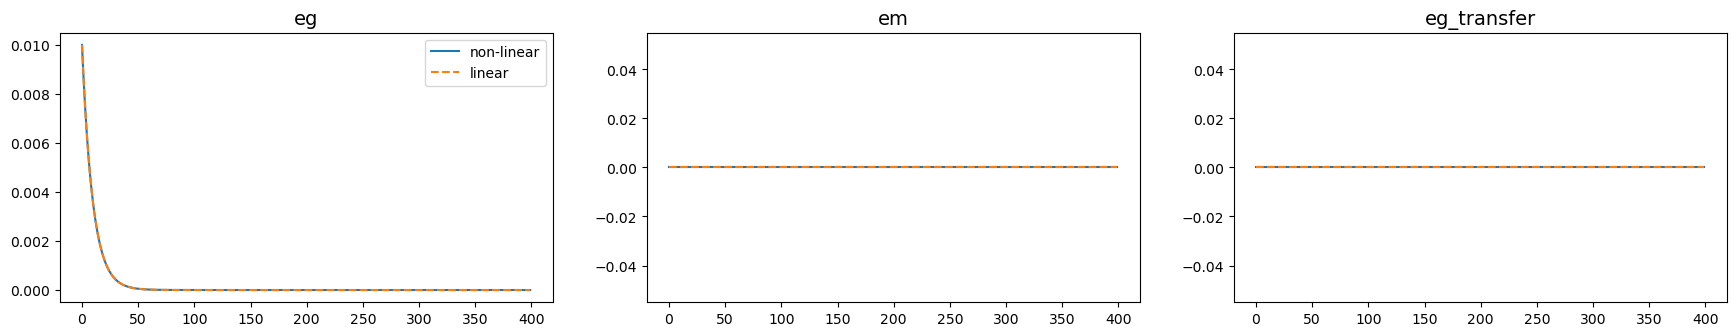


### varnames ###


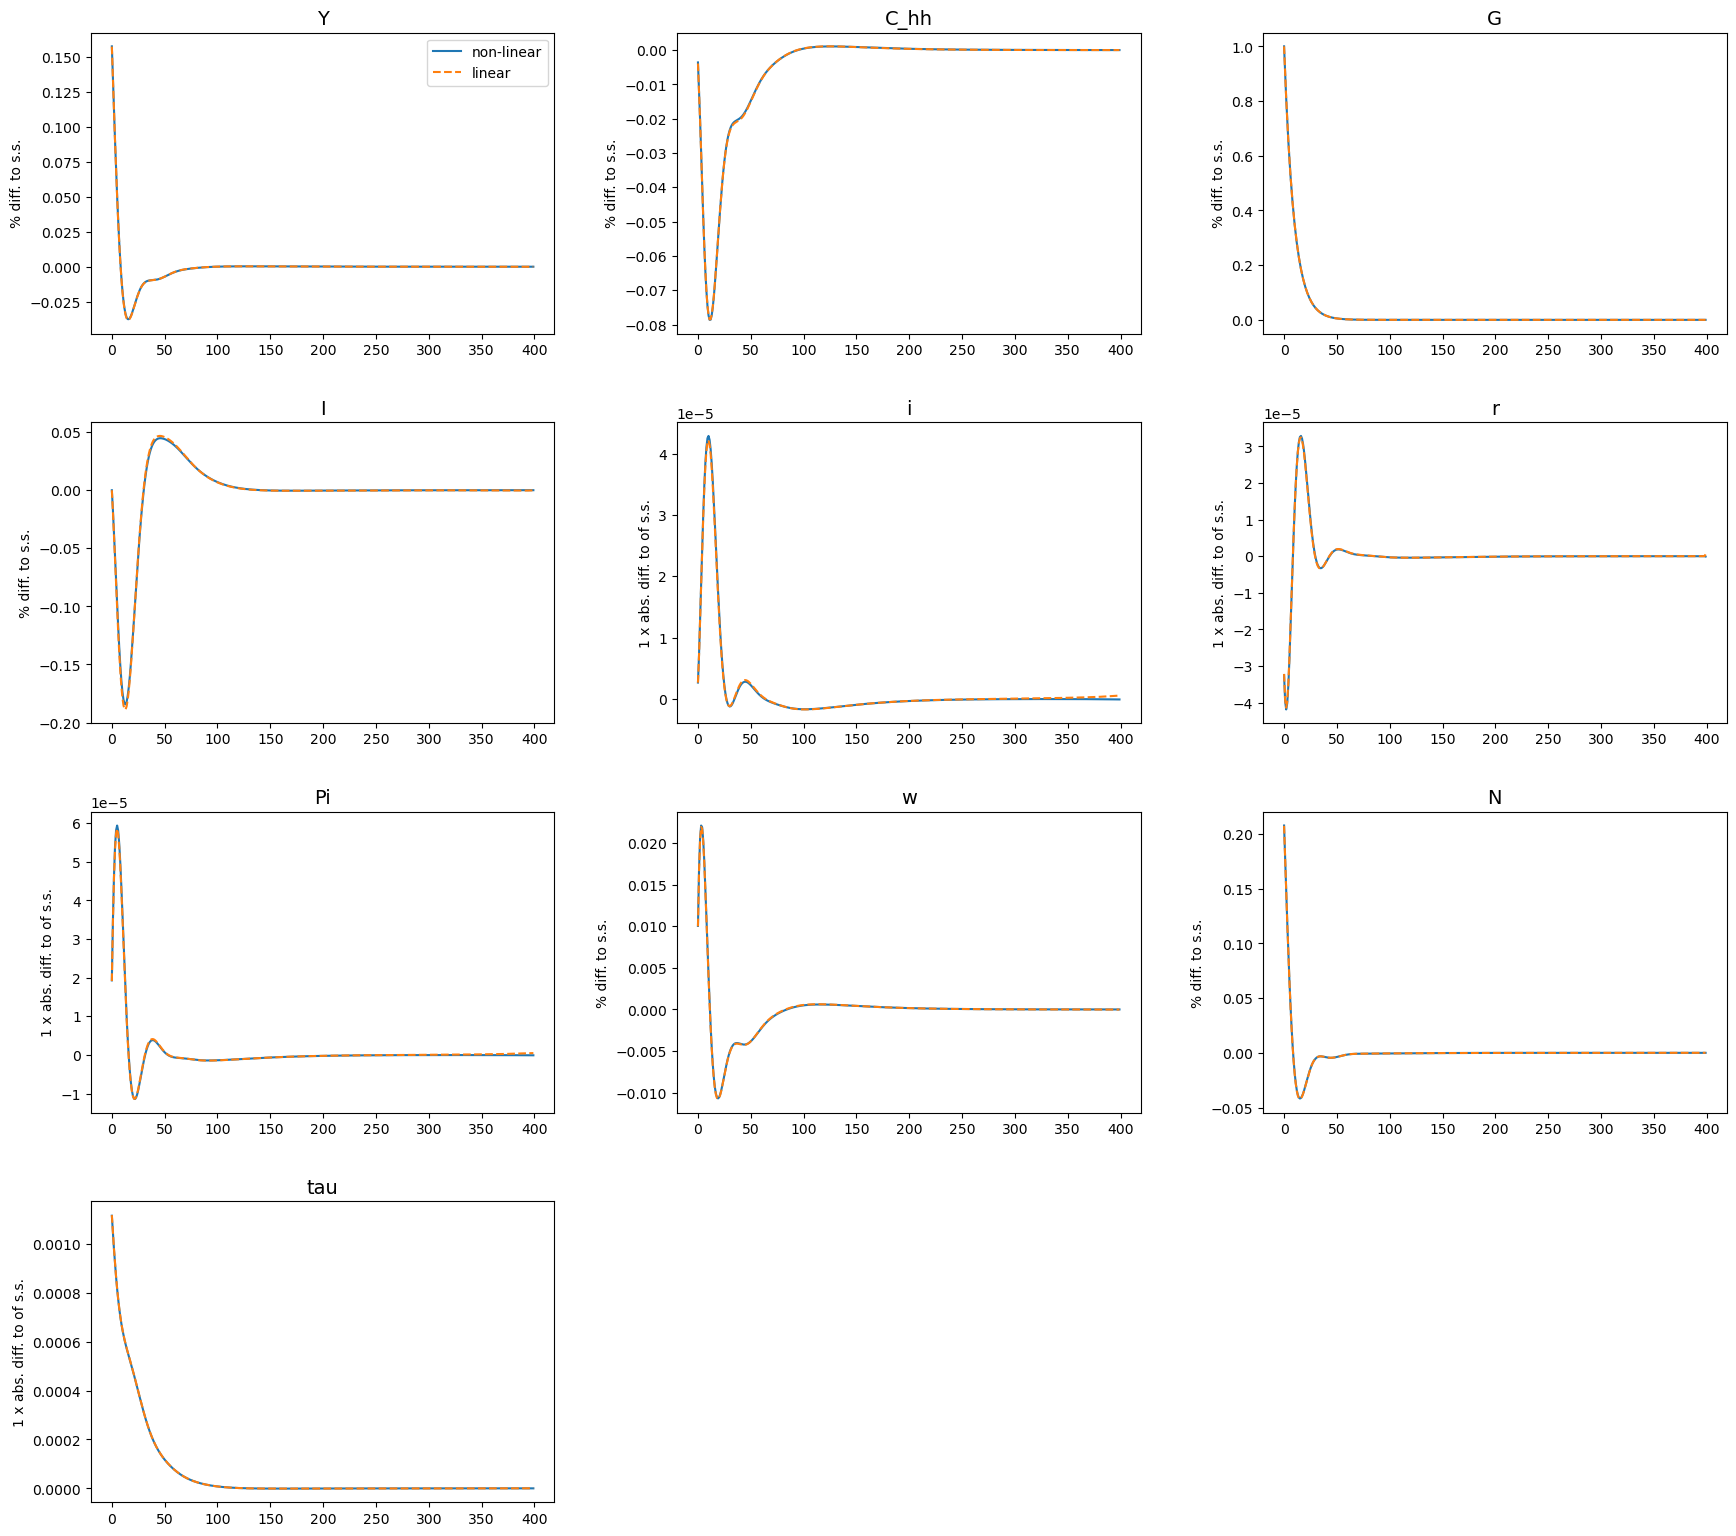


### tagets ###


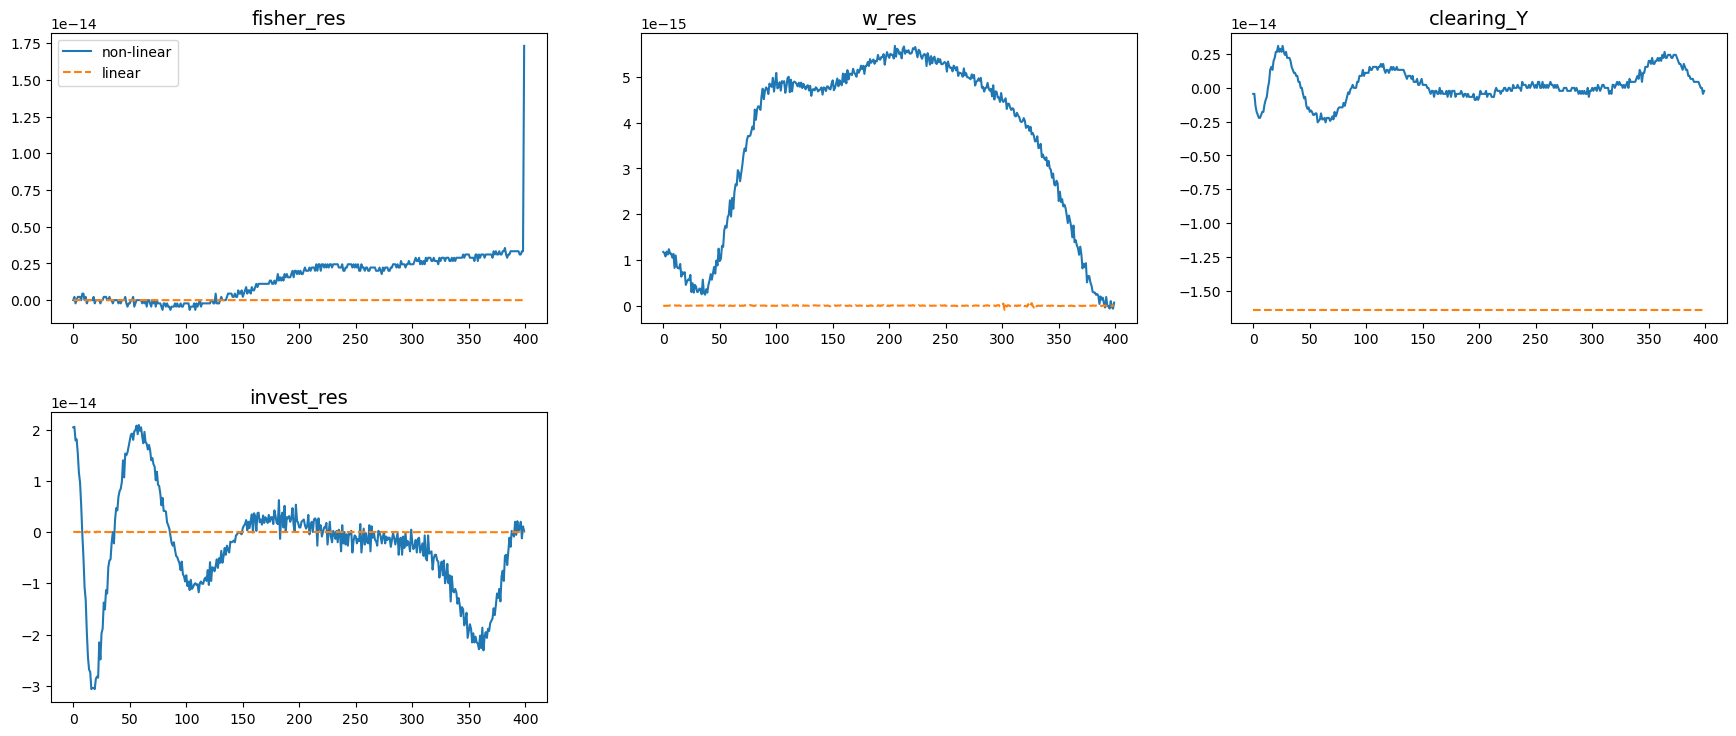

In [21]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'w', 'N', 'tau']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'ez', 'em', 'eg_transfer', 'd_tau', 'd_B', 'd_G','eB','etau','eG']
abs_diff = ['tau',  'r', 'Pi', 'i', 'rk']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=True)

In [196]:
# model.name = 'test'
# model.save()

In [197]:
IRF_full = deepcopy(model.IRF)
# path_full = model.path.__dict__.copy()

In [198]:
# model.blocks = [
#             'blocks.production_firm',
#             'blocks.price_setters',
#             'blocks.mutual_fund',
#             'blocks.government',
#             'hh',
#             'blocks.union',
#             'blocks.taylor_passive',
#             'blocks.invest_residual',
#             'blocks.fisher',
#             'blocks.real_wage',
#             'blocks.market_clearing']

In [199]:
# xi_w = 0.899
# v_w = 0.0
# xi_p = 0.926
# v_p = 0.0
# model.par.kappa_w = (1 - xi_w) * (1 - xi_w * par.beta_mean) / xi_w \
#                   * par.e_w / (v_w + par.e_w - 1)
# model.par.kappa = (1 - xi_p) * (1 - xi_p / (1 + ss.r)) / xi_p \
#                     * par.e_p / (v_p + par.e_p - 1)
# model.par.kappa_w = 0.05
# model.par.kappa = 0.03
# model.par.phi_tau = 0.1
# model.par.phi_G = 0.0

In [200]:
# # model.compute_jacs(do_print=True)
# model._compute_jac(inputs='unknowns',do_print=True)
# model._compute_jac(inputs='shocks',do_print=True)

In [201]:
# model.find_IRFs(shocks=['eg'])

In [202]:
# paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)

In [203]:
# dB = IRF_full['B']
# dtau = IRF_full['tau']
# dG = IRF_full['G']

In [204]:
# zero = []
# non_zero = []
# for key, value in model.jac.items():
#     if np.all(value == 0.0):
#         zero.append(key)
#     else:
#         non_zero.append(key)
# print(f'zero: {zero}')
# print('')
# print(f'non zero: {non_zero}')

In [205]:
# shock_dict = {
#     # 'deG': dG,
#     'detau': dtau,
#     # 'deB': dB
# }
# model.find_IRFs(shocks=shock_dict)
# # paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
# # model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)
# # model
# IRF_tau = model.IRF

In [206]:
# print(model.unknowns)
# print(model.shocks)
# test_jacs = deepcopy(model.jac)
# for i_shock,shockname in enumerate(model.shocks):
#     for i_unknown, unknownname in enumerate(model.unknowns):
#         test_jacs[(unknownname, shockname)] = model.G_U[i_unknown*par.T:(i_unknown+1)*par.T,
#                                               i_shock*par.T:(i_shock+1)*par.T]

# Misc

In [207]:
# model2 = HANKStickyModelClass(name='baseline')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value
# model.ss.__dict__['Kd'] = model.ss.__dict__['K']
# model.ss.__dict__['clearing_K'] = model.ss.__dict__['clearing_Y']

In [208]:
# model.print_unpack_varlist()

In [209]:
# model.check_non_lin(0)

In [210]:
# print(np.max(path.A - path.A_hh))